Attribute information
Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
Day: day of the week (1-7)
Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
NSWprice: New South Wales electricity price, normalized between 0 and 1
NSWdemand: New South Wales electricity demand, normalized between 0 and 1
VICprice: Victoria electricity price, normalized between 0 and 1
VICdemand: Victoria electricity demand, normalized between 0 and 1
transfer: scheduled electricity transfer between both states, normalized between 0 and 1

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
read = pd.read_csv("electricity-normalized.csv", delimiter=",")
read.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


Verificação dos dados

In [3]:
read.shape

(45312, 9)

In [4]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [5]:
read.isna().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [6]:
uniquie_values =[]
for i in read.columns[0:9].tolist():
    print(i," : ", len(read[i].astype(str).value_counts()))
    uniquie_values.append(read[i].astype(str).value_counts())

date  :  933
day  :  7
period  :  48
nswprice  :  4089
nswdemand  :  5266
vicprice  :  3798
vicdemand  :  2846
transfer  :  1878
class  :  2


In [7]:
read.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
read.duplicated().sum()

0

Análise de dados com gráficos<br>

Objetivos verificar se tem outliers
1. Historiograma
2. Boxplot
3. 

<Axes: xlabel='nswdemand', ylabel='Count'>

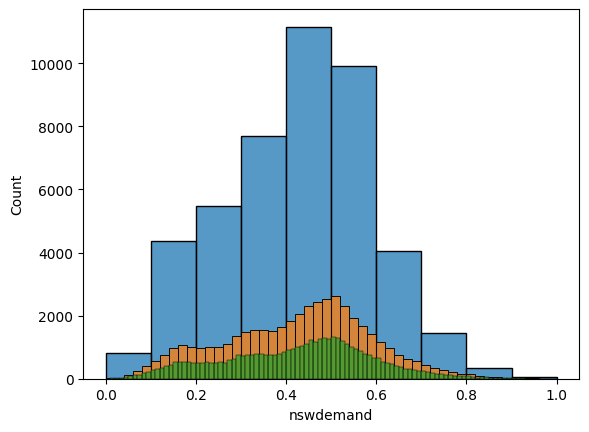

In [8]:
sn.histplot(read,x='nswdemand', bins=10)
sn.histplot(read,x='nswdemand', bins=50)
sn.histplot(read,x='nswdemand', bins=100)

<Axes: xlabel='period'>

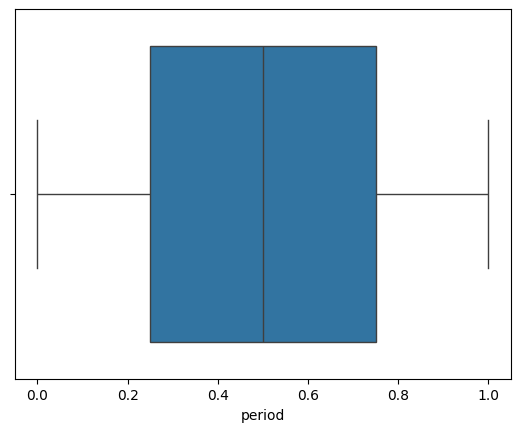

In [9]:
sn.boxplot(read,x='period')
#observações:
# O que tem outliers são: vale infor que sobre ->(max e min) ou (max) e (min) são uma forma de informar onde estão os outliers
# transfer, nswprice, vicprice, vicdemand(max e min) nswdemand (max), 
# o que fazer com esses outliers? Como fazer isso?

date
1970-01-01 00:00:00.000000000    Axes(0.125,0.11;0.775x0.77)
1970-01-01 00:00:00.000000001    Axes(0.125,0.11;0.775x0.77)
Name: date, dtype: object

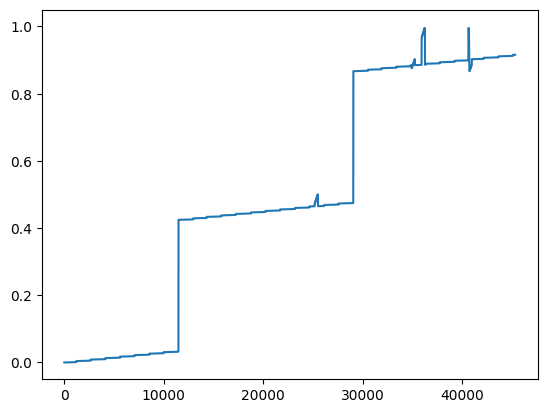

In [10]:
data = read['date'].groupby(pd.to_datetime(read['date']))
data.plot()
#pelo que observo que parece que não mostra todas as datas como é dito as informações sobre, 
#que vai de 7 May 1996 a 5 December 1998.

ValueError: num must be an integer with 1 <= num <= 4, not 5

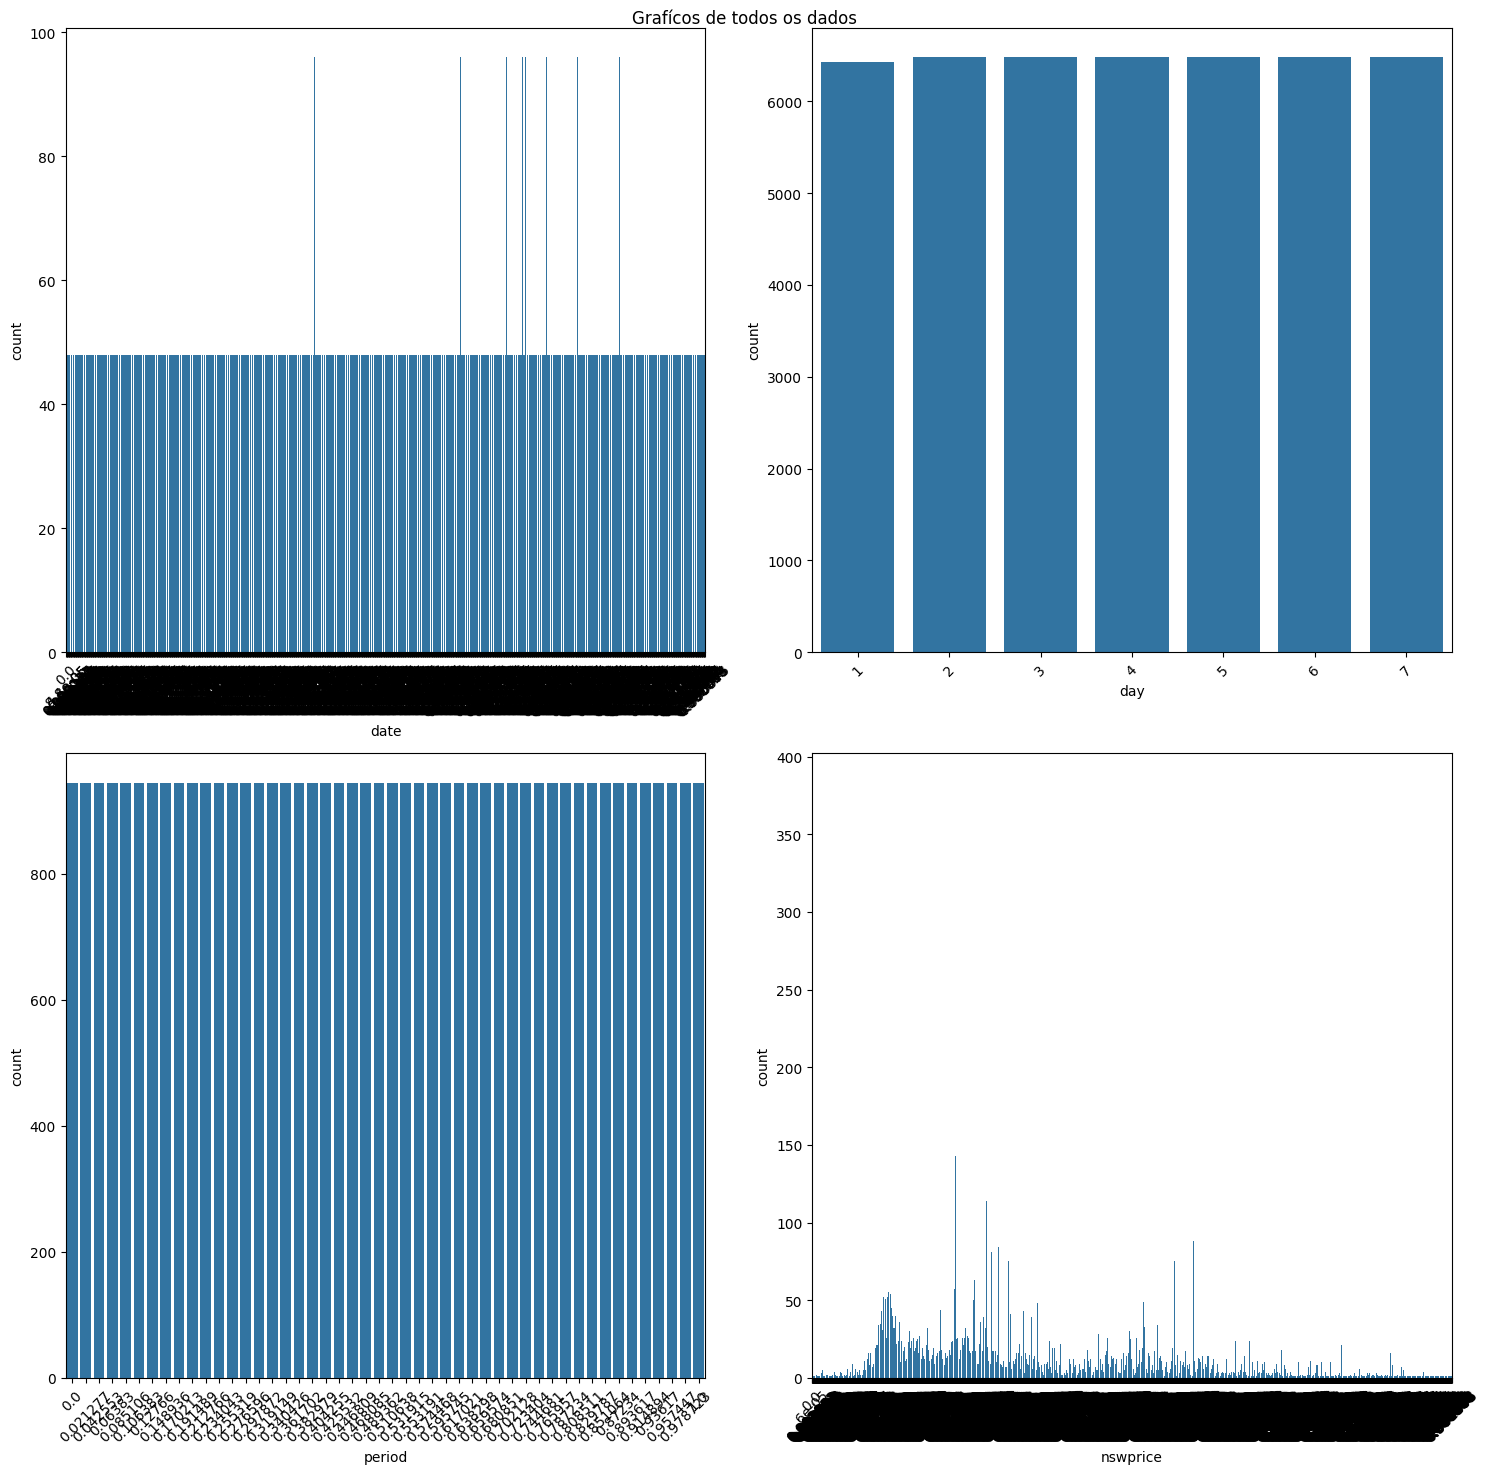

In [14]:
plt.figure(figsize=(15,15))
plt.suptitle("Grafícos de todos os dados")
point = ['date','day','period','nswprice','nswdemand','vicprice','vicdemand','transfer']

for i in range(len(point)):
    plt.subplot(2,2, i+1)
    sn.countplot(x=read[point[i]])
    plt.xlabel(point[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

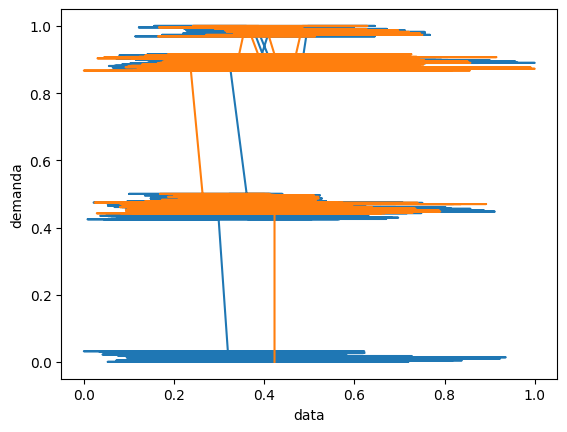

In [ ]:
plt.plot(read['nswdemand'],read['date'], label="NSW Demand")
plt.plot(read['vicdemand'], read['date'], label="VIC Demand")

plt.xlabel("data")
plt.ylabel("demanda")

plt.show() # não deu certo

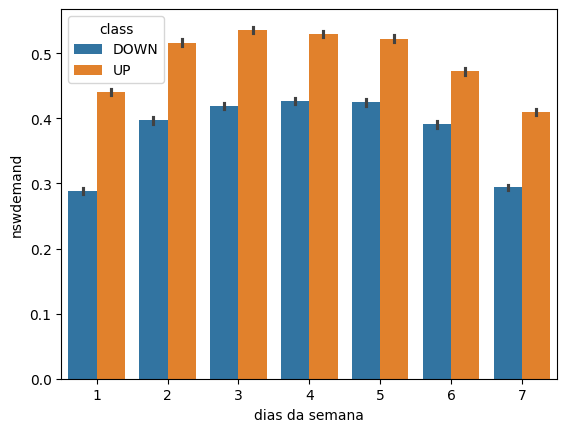

In [ ]:
#fazer a frequencia de demanda durante os dias da semana ( seg a domingo)
sn.barplot(data= read, x='day', y="nswdemand", hue = "class")

plt.xlabel("dias da semana")

plt.show()

In [ ]:
#tentar fazer dois indíces demanda do NSW e VIC e quando foi preciso repassar para ambas as regiões

